## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Punkty końcowe + orginalny')

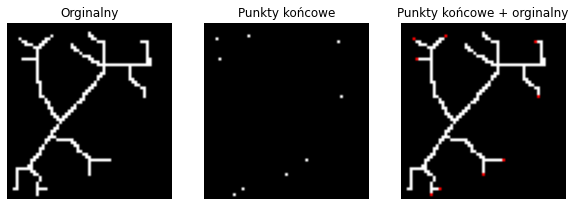

In [134]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pdb

if not os.path.exists("szkielet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/szkielet.bmp --no-check-certificate

def check_LUT(neibor,LUT):
  M = np.array([[1,8,64],
                [2,16,128],
                [4,32,256]])
  i = np.sum(M,where = neibor.astype(np.bool))
  return LUT[i]
#Brian Kernighan algorytm
def count_bits(n):
  i = 0
  while n:
    n = n & (n-1)
    i += 1
  return i

#generate LUT if exacly 2 non zero bits
LUT = np.zeros(512)
for i in range(512):
  if (i & 0b000010000) and (count_bits(i) == 2):
    LUT[i] = 1

szkielet = cv2.imread('szkielet.bmp',0)
X,Y = szkielet.shape
result = np.zeros((X,Y))

for j in range(1,Y-1):
  for i in range(1,X-1):
    if check_LUT(szkielet[i-1:i+2,j-1:j+2],LUT):
      #print(f'{szkielet[i-1:i+2,j-1:j+2]}\n') #do weryfikacji czy uzystane puntku na pewno są ok
      result[i,j] = 1

RGB = np.zeros((X,Y,3))
RGB[:,:,0] = szkielet  
RGB[:,:,1] = szkielet - 255*result
RGB[:,:,2] = szkielet - 255*result

f, axs = plt.subplots(1,3)
f.set_size_inches(10,5)
axs[0].imshow(szkielet,cmap = 'gray')
axs[0].axis('off')
axs[0].set_title('Orginalny')
axs[1].imshow(result,cmap = 'gray')
axs[1].axis('off')
axs[1].set_title('Punkty końcowe')
axs[2].imshow(RGB)
axs[2].axis('off')
axs[2].set_title('Punkty końcowe + orginalny')

In [133]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

LUT_game = np.zeros(512)
for i in range(512):
  if i & 0b000010000:
    if count_bits(i) == 3 or count_bits(i) == 4:
      LUT_game[i] = 1
  elif count_bits(i) == 3:
    LUT_game[i] = 1

plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

# sprawa krawędi rozwiązana przez rozszerzenie obrazu
def simulate_life(plansza):
  X,Y = plansza.shape
  field = np.zeros((X+2,Y+2))
  field[1:-1,1:-1] = plansza
  new_field = np.copy(field)
  fig, ax = plt.subplots()
  ims = []
  counter = 0
  while counter <= 50:
    im = ax.imshow(field[1:-1,1:-1], animated=True, cmap = 'gray')   
    ims.append([im])

    # sprawdzenie dla krawędzi
    for j in range(1,Y+2-1):
      for i in range(1,X+2-1):
          new_field[i,j] = check_LUT(field[i-1:i+2,j-1:j+2],LUT_game)


    field = np.copy(new_field)
    counter = counter + 1

  
  return animation.ArtistAnimation(fig, ims, interval=200, blit=True)

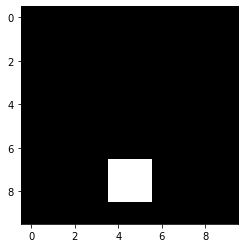

In [135]:
#plansza 1
anim = simulate_life(plansza1)
anim

In [ ]:
#plansza 2
anim = simulate_life(plansza2)
anim

In [ ]:
#oscylator i kwadrat w rogu
anim = simulate_life(np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8))
anim

Z powyższych symulacji wynika, że gra w życie działa poprawnie, aby poradzić sobie z problemem związanym z przeglądaniem otoczenia przy krawędzi do obrazka dodano ramkę 0 o szerokości 1. Pozwoliło to na poprawne działanie symulacji.